In [1]:
import pandas as pd

prices = pd.read_csv("prices_final.csv", index_col=0)
interactions = pd.read_csv("interactions_final.csv")

C:\Users\ersin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\ersin\AppData\Local\Temp\ipykernel_9096\3874788641.py:4: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactions = pd.read_csv("interactions_final.csv")


In [2]:
interactions.shape

(36139242, 19)

In [3]:
interactions.isna().sum()

Unnamed: 0            0
shares                0
rdate                 0
fdate                 0
filetype              0
diffs                 0
changeCat             0
delay                 0
cikname               0
name                  0
ticker                0
exchange              0
isDelisted            0
equityType            0
sicSector         10638
sicIndustry       10638
location           9018
oldest         12905741
newest         12905741
dtype: int64

In [4]:
interactions.rename(columns = {'rdate':'quarter'}, inplace = True)


In [5]:
interactions.head()

,Unnamed: 0,shares,quarter,fdate,filetype,diffs,changeCat,delay,cikname,name,ticker,exchange,isDelisted,equityType,sicSector,sicIndustry,location,oldest,newest
0,0,15100.0,2015-06-30,2015-08-14,13F-HR,15100.0,Buy,45,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,Tennessee; U.S.A,NaN,NaN
1,1,3615.0,2014-12-31,2015-02-13,13F-HR,3615.0,Neutral,44,AMERICAN INTERNATIONAL GROUP INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,Tennessee; U.S.A,NaN,NaN
2,2,4665.0,2015-06-30,2015-08-12,13F-HR,1050.0,Neutral,43,AMERICAN INTERNATIONAL GROUP INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,Tennessee; U.S.A,NaN,NaN
3,3,5170.0,2015-09-30,2015-11-12,13F-HR,505.0,Neutral,43,AMERICAN INTERNATIONAL GROUP INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,Tennessee; U.S.A,NaN,NaN
4,4,5162.0,2015-12-31,2016-02-11,13F-HR,-8.0,Neutral,42,AMERICAN INTERNATIONAL GROUP INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,Tennessee; U.S.A,NaN,NaN


In [6]:
interactions.drop(['Unnamed: 0', 'fdate', 'filetype', 'location', 'oldest','newest'], axis=1, inplace=True)



# MERGE UP MISSING SICS are NaN but not appear NaN when queried.


In [7]:
interactions.tail()

,shares,quarter,diffs,changeCat,delay,cikname,name,ticker,exchange,isDelisted,equityType,sicSector,sicIndustry
36139237,10296.0,2016-09-30,10296.0,Buy,21,DESCHUTES PORTFOLIO STRATEGY LLC,WAVE LIFE SCIENCES LTD,WVE,NASDAQ,False,Domestic Common Stock,Manufacturing,Pharmaceutical Preparations
36139238,10331.0,2016-12-31,35.0,Neutral,18,DESCHUTES PORTFOLIO STRATEGY LLC,WAVE LIFE SCIENCES LTD,WVE,NASDAQ,False,Domestic Common Stock,Manufacturing,Pharmaceutical Preparations
36139239,10628.0,2017-03-31,297.0,Neutral,19,DESCHUTES PORTFOLIO STRATEGY LLC,WAVE LIFE SCIENCES LTD,WVE,NASDAQ,False,Domestic Common Stock,Manufacturing,Pharmaceutical Preparations
36139240,26824.0,2017-06-30,16196.0,Buy,39,DESCHUTES PORTFOLIO STRATEGY LLC,WAVE LIFE SCIENCES LTD,WVE,NASDAQ,False,Domestic Common Stock,Manufacturing,Pharmaceutical Preparations
36139241,46824.0,2017-09-30,20000.0,Buy,20,DESCHUTES PORTFOLIO STRATEGY LLC,WAVE LIFE SCIENCES LTD,WVE,NASDAQ,False,Domestic Common Stock,Manufacturing,Pharmaceutical Preparations


In [8]:
merged_df = pd.merge(interactions, prices, on=['ticker', 'quarter'], how="left")

In [9]:
merged_df.shape

(36139242, 17)

In [10]:
merged_df.head(3)

,shares,quarter,diffs,changeCat,delay,cikname,name,ticker,exchange,isDelisted,equityType,sicSector,sicIndustry,quarterly_volatility,quarterly_volume,quarterly_price,was_in_sp500
0,15100.0,2015-06-30,15100.0,Buy,45,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,NaN,NaN,NaN,NaN
1,3615.0,2014-12-31,3615.0,Neutral,44,AMERICAN INTERNATIONAL GROUP INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,NaN,NaN,NaN,NaN
2,4665.0,2015-06-30,1050.0,Neutral,43,AMERICAN INTERNATIONAL GROUP INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,NaN,NaN,NaN,NaN


In [11]:
merged_df['cikname'].value_counts()

cikname
NORTHERN TRUST CORP                    252614
VANGUARD GROUP INC                     247392
DEUTSCHE BANK AG\                      222780
STATE STREET CORP                      215982
CITIGROUP INC                          205699
                                        ...  
HANCOCK JOHN FINANCIAL SERVICES INC         1
SEQUOIA PARTNERS CF                         1
NBGE MANAGER LLC                            1
TMFS HOLDINGS LLC                           1
SYCAMORE PARTNERS MANAGEMENT LP             1
Name: count, Length: 9338, dtype: int64

In [12]:
median_count = merged_df['cikname'].value_counts().median()
percentile_05 = merged_df['cikname'].value_counts().quantile(0.05)
percentile_95 = merged_df['cikname'].value_counts().quantile(0.95)
median_count, percentile_05, percentile_95

(697.5, 9.0, 15355.3)

### NOW WE DROP IF OCCCURRENCE OF INVESTOR IS LESS THAN 0.05TH QUANTILE

In [13]:
threshold = percentile_05

filtered_df = merged_df[merged_df.groupby('cikname')['cikname'].transform('count') > threshold]



In [14]:
filtered_df['cikname'].value_counts()

cikname
NORTHERN TRUST CORP                     252614
VANGUARD GROUP INC                      247392
DEUTSCHE BANK AG\                       222780
STATE STREET CORP                       215982
CITIGROUP INC                           205699
                                         ...  
NORWEST VENTURE PARTNERS X L P              10
POLARIS VENTURE MANAGEMENT CO IV LLC        10
LIONSTONE GP LLC                            10
SERENITY CAPITAL LLC                        10
ACCEL VI ASSOCIATES LLC                     10
Name: count, Length: 8840, dtype: int64

In [15]:
filtered_df.head()

,shares,quarter,diffs,changeCat,delay,cikname,name,ticker,exchange,isDelisted,equityType,sicSector,sicIndustry,quarterly_volatility,quarterly_volume,quarterly_price,was_in_sp500
0,15100.0,2015-06-30,15100.0,Buy,45,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,NaN,NaN,NaN,NaN
1,3615.0,2014-12-31,3615.0,Neutral,44,AMERICAN INTERNATIONAL GROUP INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,NaN,NaN,NaN,NaN
2,4665.0,2015-06-30,1050.0,Neutral,43,AMERICAN INTERNATIONAL GROUP INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,NaN,NaN,NaN,NaN
3,5170.0,2015-09-30,505.0,Neutral,43,AMERICAN INTERNATIONAL GROUP INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,NaN,NaN,NaN,NaN
4,5162.0,2015-12-31,-8.0,Neutral,42,AMERICAN INTERNATIONAL GROUP INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,NaN,NaN,NaN,NaN


# SCORE INVESTOR BASED ON SIZE OF THEIR ACTIVITIES

In [16]:
category_to_score = {
    'Significant Buy': 3,
    'Large Buy': 2,
    'Buy': 1,
    'Neutral': 0,
    'Sale': 1,
    'Large Sale': 2,
    'Significant Sale': 3
}


filtered_df['activity_score'] = filtered_df['changeCat'].map(category_to_score)
investor_scores = filtered_df.groupby('cikname')['activity_score'].sum().reset_index()

def g(df):
    median = df['activity_score'].median()
    p95 = df['activity_score'].quantile(0.95)
    df['investor_rank'] = df['activity_score'].apply(lambda x: 'small_investor' if x < median else ('medium_investor' if x < p95 else 'large_investor'))
    return df

df = g(investor_scores.copy())
df = df.drop('activity_score', axis=1)
df.head()

C:\Users\ersin\AppData\Local\Temp\ipykernel_9096\2683235039.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['activity_score'] = filtered_df['changeCat'].map(category_to_score)


,cikname,investor_rank
0,033 ASSET MANAGEMENT LLC /,small_investor
1,10-15 ASSOCIATES INC,medium_investor
2,1060 CAPITAL LLC,small_investor
3,11:11 CAPITAL CORP,small_investor
4,12 WEST CAPITAL MANAGEMENT LP,small_investor


In [17]:
merged_df.isna().sum()

shares                         0
quarter                        0
diffs                          0
changeCat                      0
delay                          0
cikname                        0
name                           0
ticker                         0
exchange                       0
isDelisted                     0
equityType                     0
sicSector                  10638
sicIndustry                10638
quarterly_volatility    13128508
quarterly_volume        13126660
quarterly_price         13126660
was_in_sp500            13126660
dtype: int64

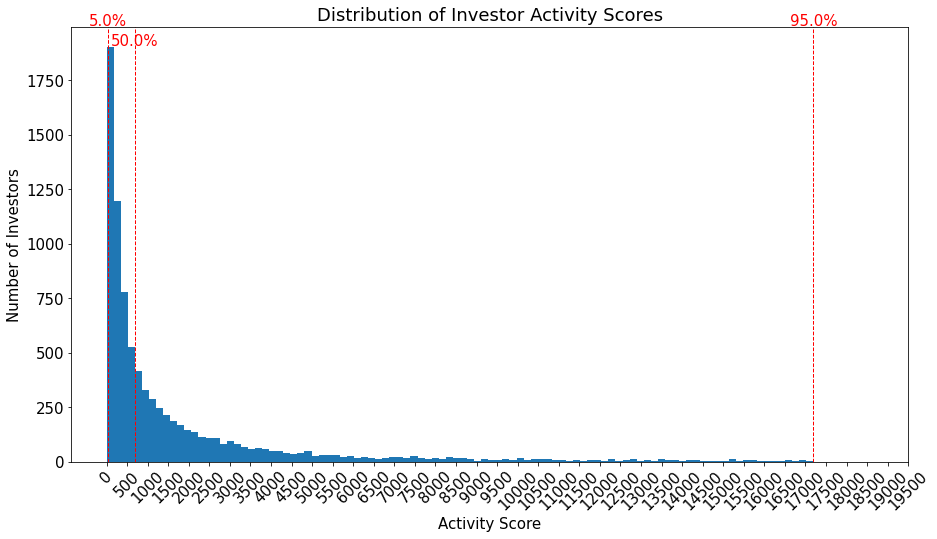

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.rcParams.update({'font.size': 15}) 

# Using a smaller number of bins to spread out the x-axis values
num_bins = 100
bin_range = (investor_scores['activity_score'].min(), investor_scores['activity_score'].quantile(0.95))

plt.hist(investor_scores['activity_score'], bins=num_bins, range=bin_range)

plt.title('Distribution of Investor Activity Scores')
plt.xlabel('Activity Score')
plt.ylabel('Number of Investors')

# Set x-ticks
xticks = list(range(0, 20000, 500))
plt.xticks(xticks, rotation=45)

# Draw vertical lines for quantiles
quantiles = investor_scores['activity_score'].quantile([0.05, 0.50, 0.95])
for quantile in quantiles:
    plt.axvline(quantile, color='r', linestyle='dashed', linewidth=1)

# Annotate the quantile lines

plt.text(
    investor_scores['activity_score'].quantile(0.05), 
    plt.gca().get_ylim()[1]+5, 
    f'{0.05*100}%', 
    color = 'red', 
    horizontalalignment='center'
)


plt.text(
    investor_scores['activity_score'].quantile(0.50), 
    plt.gca().get_ylim()[1]-85, 
    f'{0.50*100}%', 
    color = 'red', 
    horizontalalignment='center'
)

plt.text(
    investor_scores['activity_score'].quantile(0.95), 
    plt.gca().get_ylim()[1]+5, 
    f'{0.95*100}%', 
    color = 'red', 
    horizontalalignment='center'
)


"""
for percentile in [0.05, 0.50, 0.95]:
    plt.text(
        investor_scores['activity_score'].quantile(percentile), 
        plt.gca().get_ylim()[1]+100, 
        f'{percentile*100}%', 
        color = 'red', 
        horizontalalignment='center'
    )
"""
plt.show()

In [19]:
df.head()

,cikname,investor_rank
0,033 ASSET MANAGEMENT LLC /,small_investor
1,10-15 ASSOCIATES INC,medium_investor
2,1060 CAPITAL LLC,small_investor
3,11:11 CAPITAL CORP,small_investor
4,12 WEST CAPITAL MANAGEMENT LP,small_investor


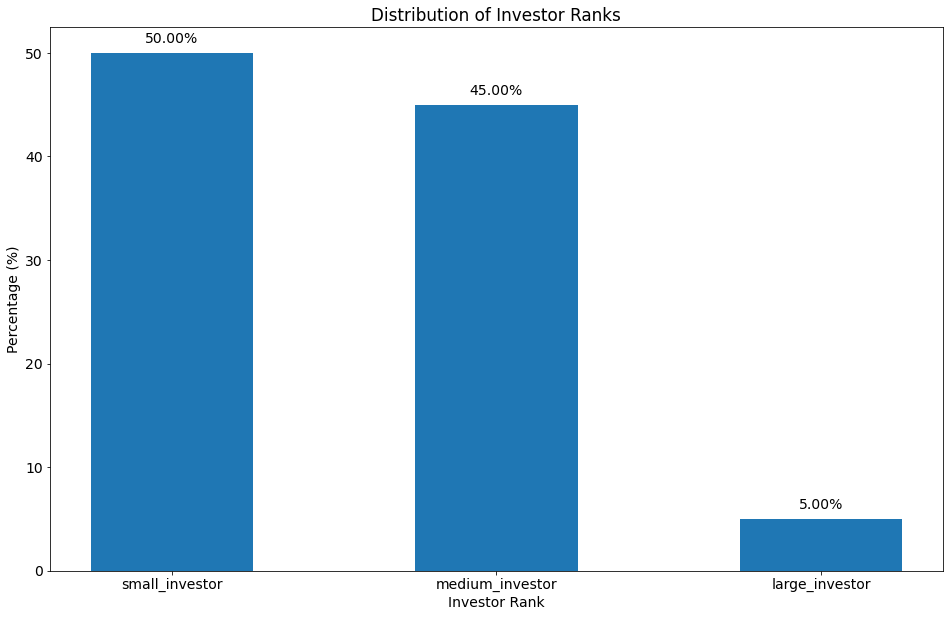

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 14}) 

# Count the frequency of each investor rank
rank_counts = df['investor_rank'].value_counts(normalize=True) * 100  # Get percentages

# Plotting the histogram
plt.bar(rank_counts.index, rank_counts.values, width=0.5)

# Adding labels and title
plt.xlabel('Investor Rank')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Investor Ranks')

# Adding percentages on top of each bar
for index, value in enumerate(rank_counts.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

# Show the plot
plt.show()



In [21]:
merged_df = pd.merge(filtered_df, df, on='cikname')
merged_df.head()

,shares,quarter,diffs,changeCat,delay,cikname,name,ticker,exchange,isDelisted,equityType,sicSector,sicIndustry,quarterly_volatility,quarterly_volume,quarterly_price,was_in_sp500,activity_score,investor_rank
0,15100.0,2015-06-30,15100.0,Buy,45,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,NaN,NaN,NaN,NaN,1,large_investor
1,2136222.0,2011-12-31,-163362.0,Large Sale,45,FRED ALGER MANAGEMENT INC,AAR CORP,AIR,NYSE,False,Domestic Common Stock,Manufacturing,Aircraft & Parts,0.038788,21965400.0,18.309682,False,2,large_investor
2,1331034.0,2012-03-31,-805188.0,Significant Sale,45,FRED ALGER MANAGEMENT INC,AAR CORP,AIR,NYSE,False,Domestic Common Stock,Manufacturing,Aircraft & Parts,0.021702,15572200.0,21.314678,False,3,large_investor
3,1124598.0,2012-12-31,1124598.0,Significant Buy,45,FRED ALGER MANAGEMENT INC,ADT CORP,ADT1,NYSE,True,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,NaN,NaN,NaN,NaN,3,large_investor
4,1468372.0,2013-03-31,343774.0,Large Buy,45,FRED ALGER MANAGEMENT INC,ADT CORP,ADT1,NYSE,True,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,NaN,NaN,NaN,NaN,2,large_investor


# CATEGORIZE VALUES

In [22]:
merged_df['delay_cat'] = merged_df['delay'].apply(lambda x: "early" if x < 45 else ("on time" if x == 45 else "late"))


In [23]:
grouped_df = merged_df.drop_duplicates(subset=['quarter','ticker'])
grouped_df.shape

(341296, 20)

In [24]:
import pandas as pd
from scipy import stats
import numpy as np 
# Assuming grouped_df and merged_df are defined

# Calculate percentiles for 'quarterly_volatility' in grouped_df
volatility_percentiles = grouped_df['quarterly_volatility'].quantile([0.05, 0.5, 0.95]).to_dict()

# Calculate percentiles for 'quarterly_volume' in grouped_df
volume_percentiles = grouped_df['quarterly_volume'].quantile([0.05, 0.5, 0.95]).to_dict()

def categorize_volume(value):
    if pd.isna(value):
        return np.nan  # Return NaN if the value is NaN
    elif value <= volume_percentiles[0.05]:
        return 'very low'
    elif value <= volume_percentiles[0.5]:
        return 'low'
    elif value <= volume_percentiles[0.95]:
        return 'high'
    else:
        return 'very high'
    

def categorize_volatility(value):
    if pd.isna(value):
        return np.nan  # Return NaN if the value is NaN
    elif value <= volatility_percentiles[0.05]:
        return 'very low'
    elif value <= volatility_percentiles[0.5]:
        return 'low'
    elif value <= volatility_percentiles[0.95]:
        return 'high'
    else:
        return 'very high'

# Apply the categorization functions to 'merged_df'
merged_df['volatility_category'] = merged_df['quarterly_volatility'].apply(categorize_volatility)
merged_df['volume_category'] = merged_df['quarterly_volume'].apply(categorize_volume)

In [25]:
merged_df.head()

,shares,quarter,diffs,changeCat,delay,cikname,name,ticker,exchange,isDelisted,...,sicIndustry,quarterly_volatility,quarterly_volume,quarterly_price,was_in_sp500,activity_score,investor_rank,delay_cat,volatility_category,volume_category
0,15100.0,2015-06-30,15100.0,Buy,45,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,AACH,NYSE,True,...,Services-Specialty Outpatient Facilities Nec,NaN,NaN,NaN,NaN,1,large_investor,on time,NaN,NaN
1,2136222.0,2011-12-31,-163362.0,Large Sale,45,FRED ALGER MANAGEMENT INC,AAR CORP,AIR,NYSE,False,...,Aircraft & Parts,0.038788,21965400.0,18.309682,False,2,large_investor,on time,high,high
2,1331034.0,2012-03-31,-805188.0,Significant Sale,45,FRED ALGER MANAGEMENT INC,AAR CORP,AIR,NYSE,False,...,Aircraft & Parts,0.021702,15572200.0,21.314678,False,3,large_investor,on time,low,low
3,1124598.0,2012-12-31,1124598.0,Significant Buy,45,FRED ALGER MANAGEMENT INC,ADT CORP,ADT1,NYSE,True,...,Services-Detective Guard & Armored Car Services,NaN,NaN,NaN,NaN,3,large_investor,on time,NaN,NaN
4,1468372.0,2013-03-31,343774.0,Large Buy,45,FRED ALGER MANAGEMENT INC,ADT CORP,ADT1,NYSE,True,...,Services-Detective Guard & Armored Car Services,NaN,NaN,NaN,NaN,2,large_investor,on time,NaN,NaN


In [26]:
merged_df.columns

Index(['shares', 'quarter', 'diffs', 'changeCat', 'delay', 'cikname', 'name',
       'ticker', 'exchange', 'isDelisted', 'equityType', 'sicSector',
       'sicIndustry', 'quarterly_volatility', 'quarterly_volume',
       'quarterly_price', 'was_in_sp500', 'activity_score', 'investor_rank',
       'delay_cat', 'volatility_category', 'volume_category'],
      dtype='object')

In [27]:
merged_df.drop(['quarterly_volatility','quarterly_volume', 'was_in_sp500', 'activity_score'], axis=1, inplace=True)





In [28]:
merged_df.head()

,shares,quarter,diffs,changeCat,delay,cikname,name,ticker,exchange,isDelisted,equityType,sicSector,sicIndustry,quarterly_price,investor_rank,delay_cat,volatility_category,volume_category
0,15100.0,2015-06-30,15100.0,Buy,45,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,NaN,large_investor,on time,NaN,NaN
1,2136222.0,2011-12-31,-163362.0,Large Sale,45,FRED ALGER MANAGEMENT INC,AAR CORP,AIR,NYSE,False,Domestic Common Stock,Manufacturing,Aircraft & Parts,18.309682,large_investor,on time,high,high
2,1331034.0,2012-03-31,-805188.0,Significant Sale,45,FRED ALGER MANAGEMENT INC,AAR CORP,AIR,NYSE,False,Domestic Common Stock,Manufacturing,Aircraft & Parts,21.314678,large_investor,on time,low,low
3,1124598.0,2012-12-31,1124598.0,Significant Buy,45,FRED ALGER MANAGEMENT INC,ADT CORP,ADT1,NYSE,True,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,NaN,large_investor,on time,NaN,NaN
4,1468372.0,2013-03-31,343774.0,Large Buy,45,FRED ALGER MANAGEMENT INC,ADT CORP,ADT1,NYSE,True,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,NaN,large_investor,on time,NaN,NaN


In [29]:
merged_df.volume_category.value_counts()

volume_category
high         14640640
very high     4315908
low           3964034
very low        90814
Name: count, dtype: int64

In [30]:
merged_df.volatility_category.value_counts()

volatility_category
low          13049795
high          7030765
very low      2486417
very high      442574
Name: count, dtype: int64

# DROP STOCKS WITH VERY RARE OCCURRENCES

In [31]:
merged_df.ticker.value_counts()

ticker
MSFT     101443
JNJ       98869
GE        94235
XOM       93991
PFE       90001
          ...  
LONDY         1
JMIC          1
COSE          1
EFIC          1
ONST          1
Name: count, Length: 12299, dtype: int64

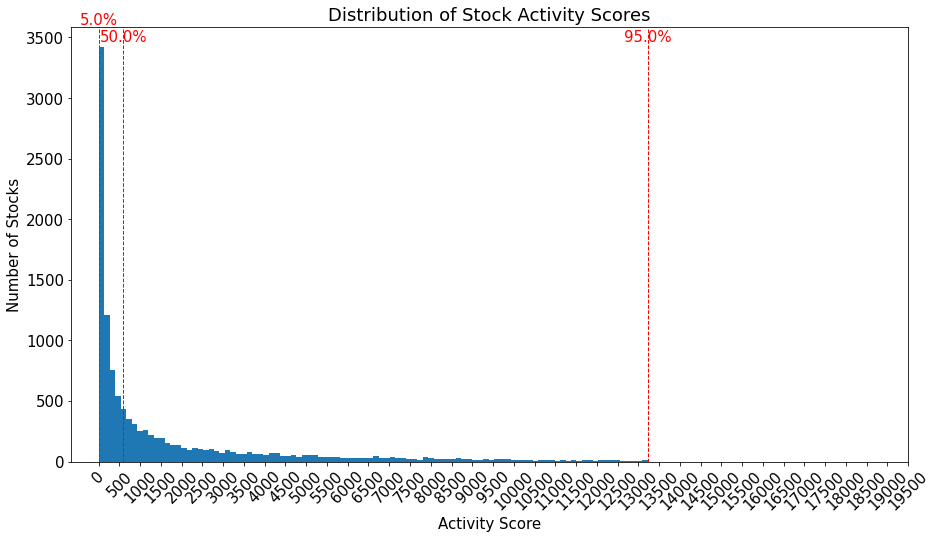

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.rcParams.update({'font.size': 15}) 

# Using a smaller number of bins to spread out the x-axis values
num_bins = 100
bin_range = (merged_df.ticker.value_counts().min(), merged_df.ticker.value_counts().quantile(0.95))

plt.hist(merged_df.ticker.value_counts(), bins=num_bins, range=bin_range)

plt.title('Distribution of Stock Activity Scores')
plt.xlabel('Activity Score')
plt.ylabel('Number of Stocks')

# Set x-ticks
xticks = list(range(0, 20000, 500))
plt.xticks(xticks, rotation=45)

# Draw vertical lines for quantiles
quantiles = merged_df.ticker.value_counts().quantile([0.05, 0.50, 0.95])
for quantile in quantiles:
    plt.axvline(quantile, color='r', linestyle='dashed', linewidth=1)

# Annotate the quantile lines


plt.text(
    merged_df.ticker.value_counts().quantile(0.05), 
    plt.gca().get_ylim()[1]+20, 
    f'{0.05*100}%', 
    color = 'red', 
    horizontalalignment='center'
)


plt.text(
    merged_df.ticker.value_counts().quantile(0.50), 
    plt.gca().get_ylim()[1]-120, 
    f'{0.50*100}%', 
    color = 'red', 
    horizontalalignment='center'
)

plt.text(
    merged_df.ticker.value_counts().quantile(0.95), 
    plt.gca().get_ylim()[1]-120, 
    f'{0.95*100}%', 
    color = 'red', 
    horizontalalignment='center'
)




"""
for percentile in [0.05, 0.50, 0.95]:
    plt.text(
        merged_df.ticker.value_counts().quantile(percentile), 
        plt.gca().get_ylim()[1], 
        f'{percentile*100}%', 
        color = 'red', 
        horizontalalignment='center'
    )
"""

plt.show()

In [33]:
mean_count = merged_df['ticker'].value_counts().mean()
percentile_05 = merged_df['ticker'].value_counts().quantile(0.05)
percentile_50 = merged_df['ticker'].value_counts().quantile(0.50)
percentile_95 = merged_df['ticker'].value_counts().quantile(0.95)
mean_count, percentile_05, percentile_50, percentile_95

(2938.221074884137, 11.0, 596.0, 13229.999999999956)

In [34]:
threshold = percentile_05

filtered2_df = merged_df[merged_df.groupby('ticker')['ticker'].transform('count') > threshold]

In [35]:
filtered2_df['ticker'].value_counts()

ticker
MSFT     101443
JNJ       98869
GE        94235
XOM       93991
PFE       90001
          ...  
QUIZ         12
LTCW         12
MZTH         12
FREE1        12
FAVE         12
Name: count, Length: 11679, dtype: int64

In [36]:
filtered2_df.shape

(36133683, 18)

In [37]:
filtered2_df.head()

,shares,quarter,diffs,changeCat,delay,cikname,name,ticker,exchange,isDelisted,equityType,sicSector,sicIndustry,quarterly_price,investor_rank,delay_cat,volatility_category,volume_category
0,15100.0,2015-06-30,15100.0,Buy,45,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,NaN,large_investor,on time,NaN,NaN
1,2136222.0,2011-12-31,-163362.0,Large Sale,45,FRED ALGER MANAGEMENT INC,AAR CORP,AIR,NYSE,False,Domestic Common Stock,Manufacturing,Aircraft & Parts,18.309682,large_investor,on time,high,high
2,1331034.0,2012-03-31,-805188.0,Significant Sale,45,FRED ALGER MANAGEMENT INC,AAR CORP,AIR,NYSE,False,Domestic Common Stock,Manufacturing,Aircraft & Parts,21.314678,large_investor,on time,low,low
3,1124598.0,2012-12-31,1124598.0,Significant Buy,45,FRED ALGER MANAGEMENT INC,ADT CORP,ADT1,NYSE,True,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,NaN,large_investor,on time,NaN,NaN
4,1468372.0,2013-03-31,343774.0,Large Buy,45,FRED ALGER MANAGEMENT INC,ADT CORP,ADT1,NYSE,True,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,NaN,large_investor,on time,NaN,NaN


In [38]:

# Calculate the mean and 95th percentile of the value counts
ticker_counts = filtered2_df['ticker'].value_counts()
percentile_50 = ticker_counts.quantile(0.50)
percentile_95 = ticker_counts.quantile(0.95)

# Function to classify each ticker
def classify_ticker(ticker):
    count = ticker_counts[ticker]
    if count < percentile_50:
        return 'small'
    elif count > percentile_95:
        return 'large'
    else:
        return 'mid'

# Apply the classification to each unique ticker
filtered2_df['ticker_classification'] = filtered2_df['ticker'].apply(classify_ticker)


C:\Users\ersin\AppData\Local\Temp\ipykernel_9096\1492003559.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2_df['ticker_classification'] = filtered2_df['ticker'].apply(classify_ticker)


In [39]:
filtered2_df.tail()

,shares,quarter,diffs,changeCat,delay,cikname,name,ticker,exchange,isDelisted,equityType,sicSector,sicIndustry,quarterly_price,investor_rank,delay_cat,volatility_category,volume_category,ticker_classification
36137176,2022077.0,2016-03-31,2022077.0,Significant Buy,46,RAYNOR GEOFFREY,ENETI INC,NETI,NYSE,False,ADR Common Stock Primary Class,Transportation Communications Electric Gas And...,Deep Sea Foreign Transportation Of Freight,NaN,small_investor,late,NaN,NaN,mid
36137177,2832675.0,2016-06-30,810598.0,Large Buy,46,RAYNOR GEOFFREY,ENETI INC,NETI,NYSE,False,ADR Common Stock Primary Class,Transportation Communications Electric Gas And...,Deep Sea Foreign Transportation Of Freight,NaN,small_investor,late,NaN,NaN,mid
36137178,1611103.0,2017-03-31,-1221572.0,Significant Sale,46,RAYNOR GEOFFREY,ENETI INC,NETI,NYSE,False,ADR Common Stock Primary Class,Transportation Communications Electric Gas And...,Deep Sea Foreign Transportation Of Freight,NaN,small_investor,late,NaN,NaN,mid
36137179,1431774.0,2017-06-30,-179329.0,Large Sale,46,RAYNOR GEOFFREY,ENETI INC,NETI,NYSE,False,ADR Common Stock Primary Class,Transportation Communications Electric Gas And...,Deep Sea Foreign Transportation Of Freight,NaN,small_investor,late,NaN,NaN,mid
36137180,896847.0,2017-09-30,-534927.0,Large Sale,45,RAYNOR GEOFFREY,ENETI INC,NETI,NYSE,False,ADR Common Stock Primary Class,Transportation Communications Electric Gas And...,Deep Sea Foreign Transportation Of Freight,NaN,small_investor,on time,NaN,NaN,mid


In [40]:
filtered2_df.shape

(36133683, 19)

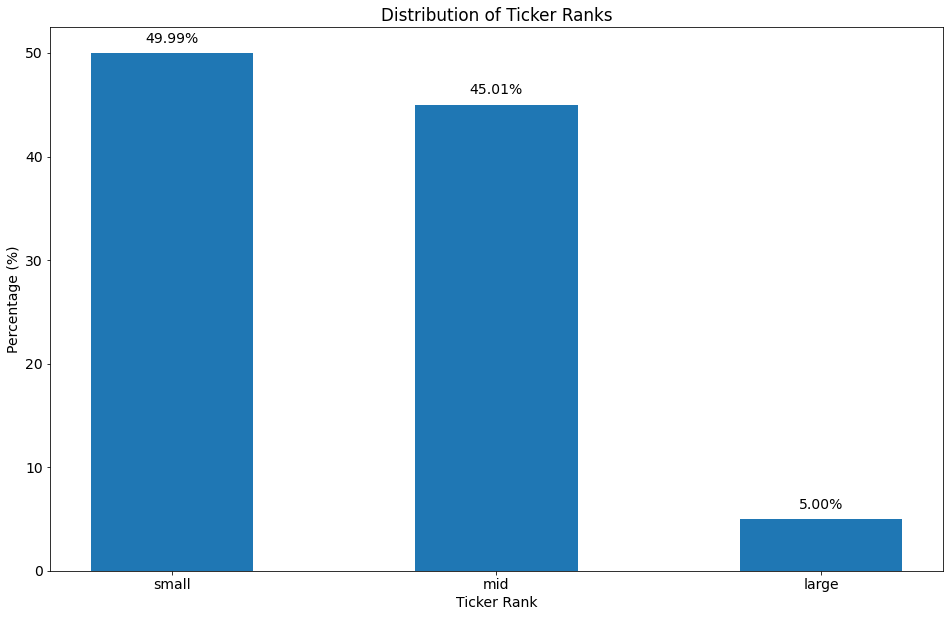

In [41]:
import matplotlib.pyplot as plt

unique_tickers_df = filtered2_df.drop_duplicates(subset='ticker')


plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 14}) 

# Count the frequency of each investor rank
rank_counts = unique_tickers_df['ticker_classification'].value_counts(normalize=True) * 100  # Get percentages

# Plotting the histogram
plt.bar(rank_counts.index, rank_counts.values, width=0.5)

# Adding labels and title
plt.xlabel('Ticker Rank')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Ticker Ranks')

# Adding percentages on top of each bar
for index, value in enumerate(rank_counts.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

# Show the plot
plt.show()


In [42]:
filtered2_df.head()

,shares,quarter,diffs,changeCat,delay,cikname,name,ticker,exchange,isDelisted,equityType,sicSector,sicIndustry,quarterly_price,investor_rank,delay_cat,volatility_category,volume_category,ticker_classification
0,15100.0,2015-06-30,15100.0,Buy,45,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,NaN,large_investor,on time,NaN,NaN,mid
1,2136222.0,2011-12-31,-163362.0,Large Sale,45,FRED ALGER MANAGEMENT INC,AAR CORP,AIR,NYSE,False,Domestic Common Stock,Manufacturing,Aircraft & Parts,18.309682,large_investor,on time,high,high,mid
2,1331034.0,2012-03-31,-805188.0,Significant Sale,45,FRED ALGER MANAGEMENT INC,AAR CORP,AIR,NYSE,False,Domestic Common Stock,Manufacturing,Aircraft & Parts,21.314678,large_investor,on time,low,low,mid
3,1124598.0,2012-12-31,1124598.0,Significant Buy,45,FRED ALGER MANAGEMENT INC,ADT CORP,ADT1,NYSE,True,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,NaN,large_investor,on time,NaN,NaN,mid
4,1468372.0,2013-03-31,343774.0,Large Buy,45,FRED ALGER MANAGEMENT INC,ADT CORP,ADT1,NYSE,True,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,NaN,large_investor,on time,NaN,NaN,mid


In [43]:
filtered2_df.columns

Index(['shares', 'quarter', 'diffs', 'changeCat', 'delay', 'cikname', 'name',
       'ticker', 'exchange', 'isDelisted', 'equityType', 'sicSector',
       'sicIndustry', 'quarterly_price', 'investor_rank', 'delay_cat',
       'volatility_category', 'volume_category', 'ticker_classification'],
      dtype='object')

In [44]:
filtered2_df

,shares,quarter,diffs,changeCat,delay,cikname,name,ticker,exchange,isDelisted,equityType,sicSector,sicIndustry,quarterly_price,investor_rank,delay_cat,volatility_category,volume_category,ticker_classification
0,15100.0,2015-06-30,15100.0,Buy,45,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,NaN,large_investor,on time,NaN,NaN,mid
1,2136222.0,2011-12-31,-163362.0,Large Sale,45,FRED ALGER MANAGEMENT INC,AAR CORP,AIR,NYSE,False,Domestic Common Stock,Manufacturing,Aircraft & Parts,18.309682,large_investor,on time,high,high,mid
2,1331034.0,2012-03-31,-805188.0,Significant Sale,45,FRED ALGER MANAGEMENT INC,AAR CORP,AIR,NYSE,False,Domestic Common Stock,Manufacturing,Aircraft & Parts,21.314678,large_investor,on time,low,low,mid
3,1124598.0,2012-12-31,1124598.0,Significant Buy,45,FRED ALGER MANAGEMENT INC,ADT CORP,ADT1,NYSE,True,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,NaN,large_investor,on time,NaN,NaN,mid
4,1468372.0,2013-03-31,343774.0,Large Buy,45,FRED ALGER MANAGEMENT INC,ADT CORP,ADT1,NYSE,True,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,NaN,large_investor,on time,NaN,NaN,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36137176,2022077.0,2016-03-31,2022077.0,Significant Buy,46,RAYNOR GEOFFREY,ENETI INC,NETI,NYSE,False,ADR Common Stock Primary Class,Transportation Communications Electric Gas And...,Deep Sea Foreign Transportation Of Freight,NaN,small_investor,late,NaN,NaN,mid
36137177,2832675.0,2016-06-30,810598.0,Large Buy,46,RAYNOR GEOFFREY,ENETI INC,NETI,NYSE,False,ADR Common Stock Primary Class,Transportation Communications Electric Gas And...,Deep Sea Foreign Transportation Of Freight,NaN,small_investor,late,NaN,NaN,mid
36137178,1611103.0,2017-03-31,-1221572.0,Significant Sale,46,RAYNOR GEOFFREY,ENETI INC,NETI,NYSE,False,ADR Common Stock Primary Class,Transportation Communications Electric Gas And...,Deep Sea Foreign Transportation Of Freight,NaN,small_investor,late,NaN,NaN,mid
36137179,1431774.0,2017-06-30,-179329.0,Large Sale,46,RAYNOR GEOFFREY,ENETI INC,NETI,NYSE,False,ADR Common Stock Primary Class,Transportation Communications Electric Gas And...,Deep Sea Foreign Transportation Of Freight,NaN,small_investor,late,NaN,NaN,mid


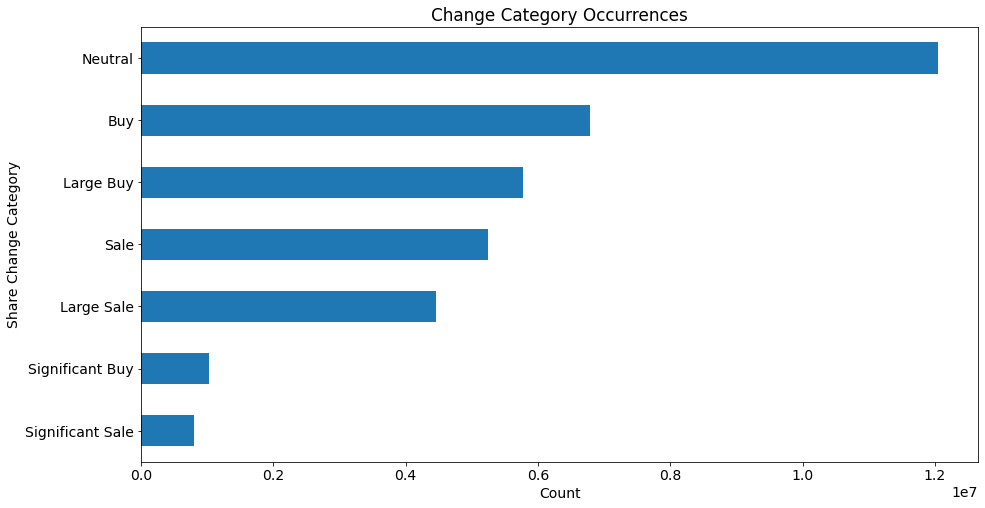

In [45]:
import matplotlib.pyplot as plt

change_counts = filtered2_df['changeCat'].value_counts()

change_counts = change_counts.sort_values(ascending=True)

plt.figure(figsize=(15, 8))
change_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Share Change Category')
plt.title('Change Category Occurrences')
plt.xticks()
plt.show()


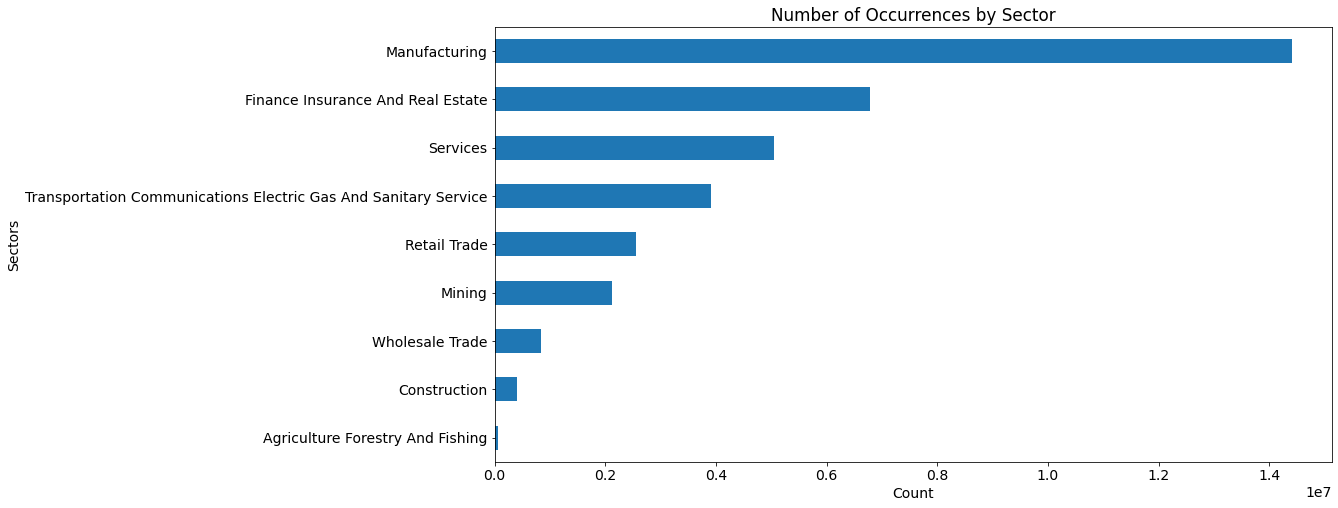

In [46]:
import matplotlib.pyplot as plt

change_counts = filtered2_df['sicSector'].value_counts()[0:-1]

change_counts = change_counts.sort_values(ascending=True)

plt.figure(figsize=(15, 8))
change_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Sectors')
plt.title('Number of Occurrences by Sector')
plt.xticks()
plt.show()


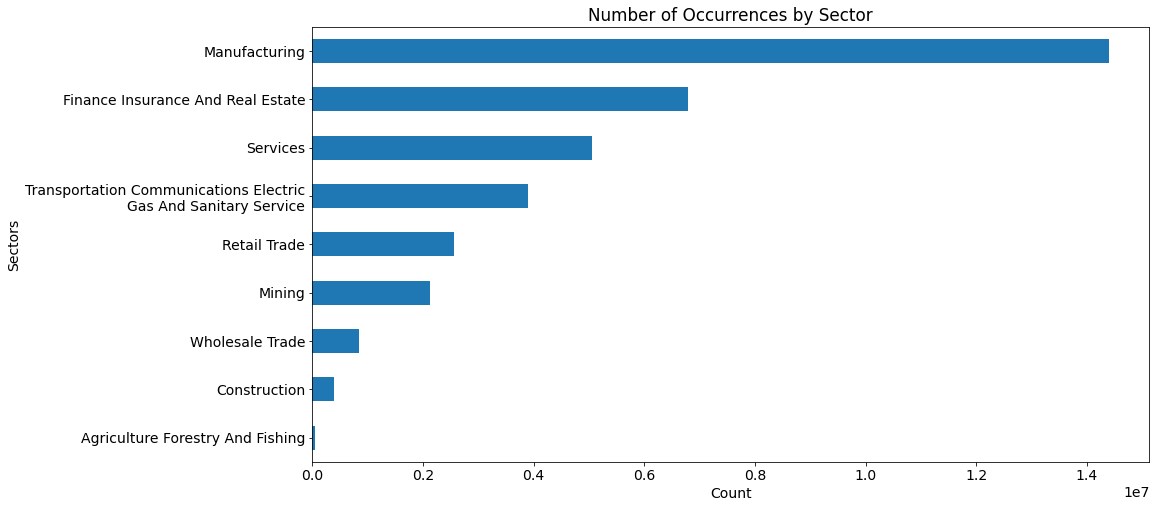

In [47]:
import matplotlib.pyplot as plt

# Assuming your DataFrame and counts are already prepared
change_counts = filtered2_df['sicSector'].value_counts()[0:-1]
change_counts = change_counts.sort_values(ascending=True)

plt.figure(figsize=(15, 8))
change_counts.plot(kind='barh')

# Here, replace 'LongSectorName' with the actual long name, and split it as needed
new_labels = [label.replace('Transportation Communications Electric Gas And Sanitary Service', 'Transportation Communications Electric\nGas And Sanitary Service') for label in change_counts.index]

plt.yticks(ticks=range(len(new_labels)), labels=new_labels)  # Set the new labels

plt.xlabel('Count')
plt.ylabel('Sectors')
plt.title('Number of Occurrences by Sector')
plt.xticks()
plt.show()


In [49]:
filtered2_df.head()

,shares,quarter,diffs,changeCat,delay,cikname,name,ticker,exchange,isDelisted,equityType,sicSector,sicIndustry,quarterly_price,investor_rank,delay_cat,volatility_category,volume_category,ticker_classification
0,15100.0,2015-06-30,15100.0,Buy,45,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,AACH,NYSE,True,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,NaN,large_investor,on time,NaN,NaN,mid
1,2136222.0,2011-12-31,-163362.0,Large Sale,45,FRED ALGER MANAGEMENT INC,AAR CORP,AIR,NYSE,False,Domestic Common Stock,Manufacturing,Aircraft & Parts,18.309682,large_investor,on time,high,high,mid
2,1331034.0,2012-03-31,-805188.0,Significant Sale,45,FRED ALGER MANAGEMENT INC,AAR CORP,AIR,NYSE,False,Domestic Common Stock,Manufacturing,Aircraft & Parts,21.314678,large_investor,on time,low,low,mid
3,1124598.0,2012-12-31,1124598.0,Significant Buy,45,FRED ALGER MANAGEMENT INC,ADT CORP,ADT1,NYSE,True,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,NaN,large_investor,on time,NaN,NaN,mid
4,1468372.0,2013-03-31,343774.0,Large Buy,45,FRED ALGER MANAGEMENT INC,ADT CORP,ADT1,NYSE,True,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,NaN,large_investor,on time,NaN,NaN,mid


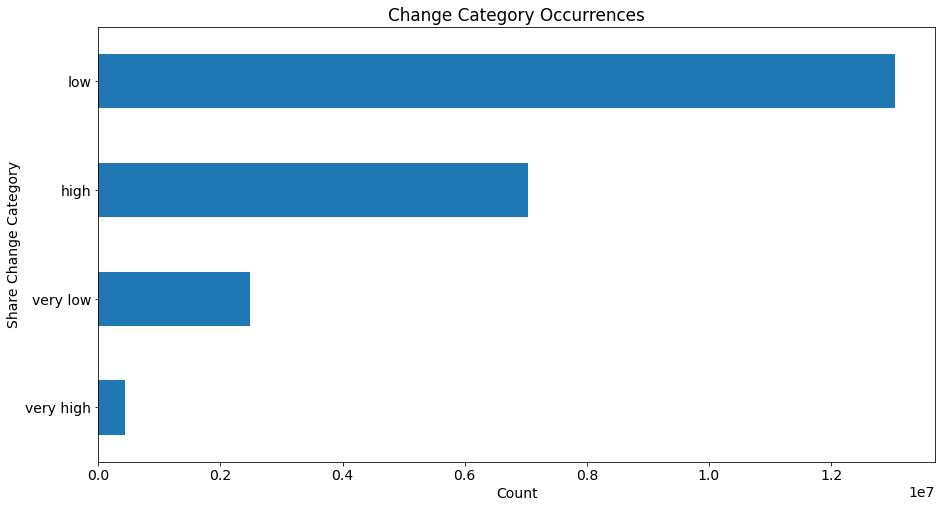

In [50]:
import matplotlib.pyplot as plt

change_counts = filtered2_df['volatility_category'].value_counts()

change_counts = change_counts.sort_values(ascending=True)

plt.figure(figsize=(15, 8))
change_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Share Change Category')
plt.title('Change Category Occurrences')
plt.xticks()
plt.show()


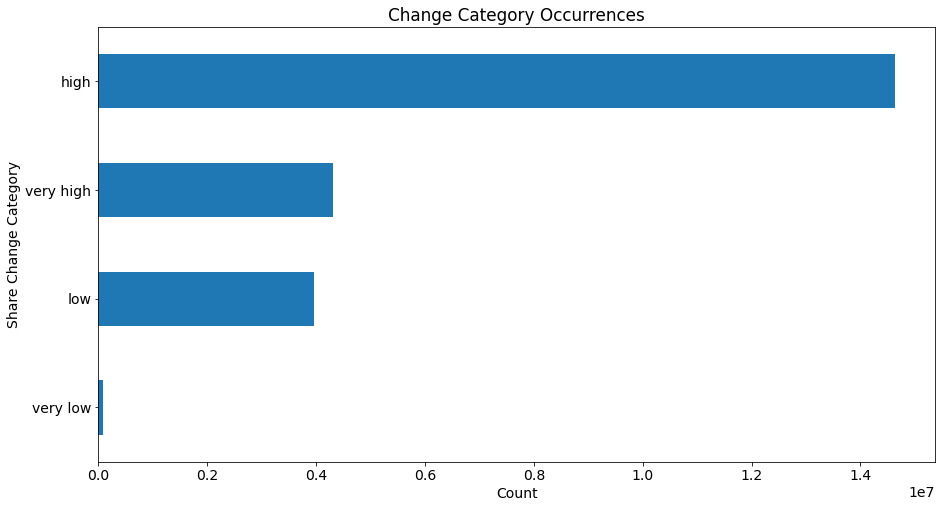

In [51]:
import matplotlib.pyplot as plt

change_counts = filtered2_df['volume_category'].value_counts()

change_counts = change_counts.sort_values(ascending=True)

plt.figure(figsize=(15, 8))
change_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Share Change Category')
plt.title('Change Category Occurrences')
plt.xticks()
plt.show()


# CREATE GRAPH EFFICIENTLY

In [75]:
investors = filtered2_df.drop_duplicates(subset=["cikname", "investor_rank"])[["cikname", "investor_rank"]]

stock_column_list = ["name", "ticker","equityType","sicSector","sicIndustry","ticker_classification"]
stocks = filtered2_df.drop_duplicates(subset=stock_column_list)[stock_column_list]

edge_column_list = ["cikname", "name","quarter","changeCat","delay_cat","volatility_category","volume_category"]

edges = filtered2_df.drop_duplicates(subset=edge_column_list)[edge_column_list]
edges = edges[edges['changeCat'] != "Neutral"]

buys_list = ["Buy","Large Buy", "Significant Buy"]
edges['direction'] = edges['changeCat'].apply(lambda x: "stock_to_investor" if x in buys_list else "investor_to_stock")

In [76]:
# NEUTRAL CHANGES ARE DROPPED.
# ALL NODE AND EDGE FEATURES ARE GROUPED

In [77]:
investors.shape, stocks.shape, edges.shape

((8840, 2), (11679, 6), (24034481, 8))

In [79]:
edges.head()

,cikname,name,quarter,changeCat,delay_cat,volatility_category,volume_category,direction
0,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,2015-06-30,Buy,on time,NaN,NaN,stock_to_investor
1,FRED ALGER MANAGEMENT INC,AAR CORP,2011-12-31,Large Sale,on time,very low,high,investor_to_stock
2,FRED ALGER MANAGEMENT INC,AAR CORP,2012-03-31,Significant Sale,on time,very low,low,investor_to_stock
3,FRED ALGER MANAGEMENT INC,ADT CORP,2012-12-31,Significant Buy,on time,NaN,NaN,stock_to_investor
4,FRED ALGER MANAGEMENT INC,ADT CORP,2013-03-31,Large Buy,on time,NaN,NaN,stock_to_investor


In [80]:
stocks.head()

,name,ticker,equityType,sicSector,sicIndustry,ticker_classification
0,AAC HOLDINGS INC,AACH,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,mid
1,AAR CORP,AIR,Domestic Common Stock,Manufacturing,Aircraft & Parts,mid
3,ADT CORP,ADT1,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,mid
8,AFLAC INC,AFL,Domestic Common Stock Primary Class,Finance Insurance And Real Estate,Accident & Health Insurance,large
17,AMC NETWORKS INC,AMCX,Domestic Common Stock,Transportation Communications Electric Gas And...,Cable & Other Pay Television Services,mid


In [1]:
investors.head()

NameError: name 'investors' is not defined

In [90]:
edges.to_csv("edges.csv")
stocks.to_csv("stocks.csv")
investors.to_csv("investors.csv")
